In [193]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import rfpimp
from sklearn.decomposition import PCA

## univariate analysis

In [194]:
df = pd.read_csv("Housing.csv")

In [195]:
df

,price,area,length,width,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1465896,244316,593,412,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,3123904,390488,734,532,4,4,4,yes,no,no,no,yes,3,no,furnished
2,1519896,379974,498,763,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,1152112,288028,382,754,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,887292,221823,503,441,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,377880,188940,470,402,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,483084,241542,497,486,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,364276,182138,374,487,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,734160,367080,570,644,3,1,1,no,no,no,no,no,0,no,furnished


In [196]:
print("Mean of area: ", df['area'].mean())
print("Mode of area: ", df['area'].mode())
print("Median of area: ", df['area'].median())
print("Z-Score of area: ", stats.zscore(df['area']))

Mean of area:  293234.97247706424
Mode of area:  0    261370
dtype: int64
Median of area:  273824.0
Z-Score of area:  [-0.4332038   0.86122784  0.76812072 -0.04611054 -0.63239141 -0.56862268
 -0.25658896  1.24031569  1.96588531 -0.29209966 -0.16112626 -0.58746726
 -1.11879952  0.22371769  0.65728481  0.41660901  1.3931977  -0.68409004
 -1.25715844 -0.79744977 -1.34606804 -0.24815849 -1.09364979  2.28533997
 -0.15297031 -0.27886949  0.8250264   0.29302998 -0.63908619  0.69134321
 -1.62265304 -0.45585626  0.37562558 -0.46448156 -0.6831602  -0.9383768
  0.89488774 -0.42955532 -0.59726149 -0.12605833 -0.40763786 -1.28090899
  0.47071634 -0.66964665  0.79713146  1.89427943 -0.96697133 -0.68001649
  0.21208151  0.7273941  -0.17228424 -0.56564722  0.0307201  -0.90020943
 -0.55524196 -0.32970028 -1.1880144   0.28244762  0.03977046 -0.73991534
 -1.7570004   0.32440515  1.16515875  0.31675397 -0.04819159  0.49914262
  1.40373579 -0.09091956 -0.23531796  1.86077008 -1.0937472   1.16173165
 -0.343

## Classifier and prediction 

In [197]:
column =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
df[column] = df[column].apply(LabelEncoder().fit_transform)
X = df.drop('furnishingstatus',axis=1)
y = df['furnishingstatus']
X_train, X_test, y_train, y_test = train_test_split(X , y , test_size = 0.3 , random_state = 51)

In [198]:
from sklearn import svm
#Create a svm Classifier

clf = svm.SVC()
#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [199]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report 
print ("Accuracy : " , accuracy_score(y_test,y_pred)*100)  
print("Report : \n", classification_report(y_test, y_pred))
print("F1 Score : ",f1_score(y_test, y_pred, average='macro')*100)

Accuracy :  41.46341463414634
Report : 
               precision    recall  f1-score   support

           0       0.22      0.05      0.08        39
           1       0.43      0.94      0.59        70
           2       0.00      0.00      0.00        55

    accuracy                           0.41       164
   macro avg       0.22      0.33      0.22       164
weighted avg       0.23      0.41      0.27       164

F1 Score :  22.333333333333336


C:\Users\QASIM KHAN\Downloads\New folder\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\QASIM KHAN\Downloads\New folder\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\QASIM KHAN\Downloads\New folder\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Normalizing and then predicting again 

In [200]:
sc_X = StandardScaler()
colum = []
for i in df.columns:
    colum.append(i)
df = sc_X.fit_transform(df)
df = pd.DataFrame(df, columns=colum)
df

,price,area,length,width,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,0.610794,-0.433204,0.363412,-0.918937,1.403419,1.421812,1.378217,0.405623,-0.465315,-0.734539,-0.219265,1.472618,1.517692,1.804941,-1.406286
1,3.098294,0.861228,1.314711,-0.088159,1.403419,5.405809,2.532024,0.405623,-0.465315,-0.734539,-0.219265,1.472618,2.679409,-0.554035,-1.406286
2,0.691810,0.768121,-0.277535,1.511089,0.047278,1.421812,0.224410,0.405623,-0.465315,1.361397,-0.219265,-0.679063,1.517692,1.804941,-0.091662
3,0.140026,-0.046111,-1.060165,1.448781,1.403419,1.421812,0.224410,0.405623,-0.465315,1.361397,-0.219265,1.472618,2.679409,1.804941,-1.406286
4,-0.257282,-0.632391,-0.243801,-0.718166,1.403419,-0.570187,0.224410,0.405623,2.149083,1.361397,-0.219265,1.472618,1.517692,-0.554035,-1.406286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,-1.021550,-0.923588,-0.466446,-0.988169,-1.308863,-0.570187,-0.929397,0.405623,-0.465315,1.361397,-0.219265,-0.679063,1.517692,-0.554035,1.222962
541,-0.863713,-0.457769,-0.284282,-0.406624,0.047278,-0.570187,-0.929397,-2.465344,-0.465315,-0.734539,-0.219265,-0.679063,-0.805741,-0.554035,-0.091662
542,-1.041960,-0.983823,-1.114139,-0.399701,-1.308863,-0.570187,-0.929397,0.405623,-0.465315,-0.734539,-0.219265,-0.679063,-0.805741,-0.554035,1.222962
543,-0.487025,0.653937,0.208235,0.687234,0.047278,-0.570187,-0.929397,-2.465344,-0.465315,-0.734539,-0.219265,-0.679063,-0.805741,-0.554035,-1.406286


## Evaluate your results, was normalization helpful? If yes then which one outperformed rest and why? 

In [201]:
from sklearn import svm
#Create a svm Classifier

clf = svm.SVC(kernel='poly')
#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [202]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report 
print ("Accuracy : " , accuracy_score(y_test,y_pred)*100)  
print("Report : \n", classification_report(y_test, y_pred))
print("F1 Score : ",f1_score(y_test, y_pred, average='macro')*100)

Accuracy :  42.68292682926829
Report : 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        39
           1       0.43      1.00      0.60        70
           2       0.00      0.00      0.00        55

    accuracy                           0.43       164
   macro avg       0.14      0.33      0.20       164
weighted avg       0.18      0.43      0.26       164

F1 Score :  19.943019943019944


C:\Users\QASIM KHAN\Downloads\New folder\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\QASIM KHAN\Downloads\New folder\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\QASIM KHAN\Downloads\New folder\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


*After Normalizing, My accuracy increased by 1.2 % but F1 score decreased by 3%.
Overall, Normalizing helped accuracy to increase thus increasing prediction probability and hence better model trained

## Plot the area w.r.t to its independent variables in 2D and 3D 

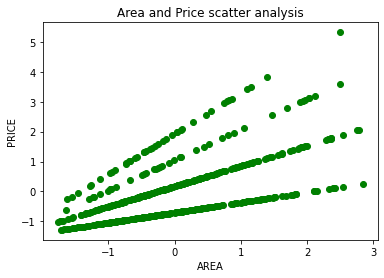

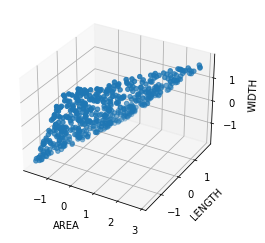

In [205]:
y=df['price']
x=df['area']

plt.scatter(x, y ,c="g")

plt.title('Area and Price scatter analysis')
plt.xlabel('AREA')
plt.ylabel('PRICE')

plt.show()

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(df["area"], df["length"], df["width"], s=20)
ax.set_xlabel('AREA')
ax.set_ylabel('LENGTH')
ax.set_zlabel('WIDTH')

plt.show()

## Find the covariance &amp; correlation matrix of the normalized data 

In [207]:
df.cov()

,price,area,length,width,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
price,1.001838,0.608944,0.436324,0.407959,0.336380,0.276730,0.741759,0.070169,0.037967,-0.172945,0.014038,0.225293,-0.055353,0.008270,-0.097293
area,0.608944,1.001838,0.697232,0.678671,0.033918,0.042852,-0.000483,-0.058366,-0.003933,-0.051807,0.003438,-0.015291,-0.125201,-0.045061,-0.025256
length,0.436324,0.697232,1.001838,-0.021085,0.071760,0.040611,0.008649,-0.048765,0.027652,-0.019026,-0.052014,0.091522,-0.031255,0.004758,-0.000019
width,0.407959,0.678671,-0.021085,1.001838,-0.000657,0.032208,0.006311,-0.025667,-0.039400,-0.052312,0.050895,-0.090836,-0.133998,-0.075292,-0.035985
bedrooms,0.336380,0.033918,0.071760,-0.000657,1.001838,0.374618,0.409315,-0.012055,0.080697,0.097491,0.046134,0.160898,0.139526,0.079168,-0.123471
bathrooms,0.276730,0.042852,0.040611,0.032208,0.374618,1.001838,0.326764,0.042476,0.126701,0.102293,0.067283,0.187259,0.177822,0.063588,-0.143823
stories,0.741759,-0.000483,0.008649,0.006311,0.409315,0.326764,1.001838,0.121930,0.043618,-0.172711,0.018881,0.294142,0.045631,0.044507,-0.104865
mainroad,0.070169,-0.058366,-0.048765,-0.025667,-0.012055,0.042476,0.121930,1.001838,0.092507,0.044083,-0.011803,0.105617,0.204808,0.200243,-0.157014
guestroom,0.037967,-0.003933,0.027652,-0.039400,0.080697,0.126701,0.043618,0.092507,1.001838,0.372750,-0.010327,0.138433,0.037535,0.161193,-0.118545
basement,-0.172945,-0.051807,-0.019026,-0.052312,0.097491,0.102293,-0.172711,0.044083,0.372750,1.001838,0.004393,0.047428,0.051592,0.228502,-0.113038


In [209]:
df.corr()

,price,area,length,width,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
price,1.000000,0.607827,0.435523,0.407210,0.335762,0.276222,0.740398,0.070040,0.037897,-0.172628,0.014013,0.224880,-0.055252,0.008255,-0.097114
area,0.607827,1.000000,0.695952,0.677425,0.033856,0.042773,-0.000482,-0.058259,-0.003926,-0.051712,0.003432,-0.015263,-0.124971,-0.044978,-0.025209
length,0.435523,0.695952,1.000000,-0.021047,0.071629,0.040536,0.008633,-0.048675,0.027602,-0.018991,-0.051918,0.091354,-0.031198,0.004749,-0.000019
width,0.407210,0.677425,-0.021047,1.000000,-0.000656,0.032149,0.006299,-0.025620,-0.039328,-0.052216,0.050802,-0.090670,-0.133752,-0.075153,-0.035919
bedrooms,0.335762,0.033856,0.071629,-0.000656,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,0.079023,-0.123244
bathrooms,0.276222,0.042773,0.040536,0.032149,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472,-0.143559
stories,0.740398,-0.000482,0.008633,0.006299,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425,-0.104672
mainroad,0.070040,-0.058259,-0.048675,-0.025620,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876,-0.156726
guestroom,0.037897,-0.003926,0.027602,-0.039328,0.080549,0.126469,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466,0.160897,-0.118328
basement,-0.172628,-0.051712,-0.018991,-0.052216,0.097312,0.102106,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,0.228083,-0.112831


## Find the correlation of length and area and plot it,. 

            area    length
area    1.000000  0.695952
length  0.695952  1.000000


<AxesSubplot:>

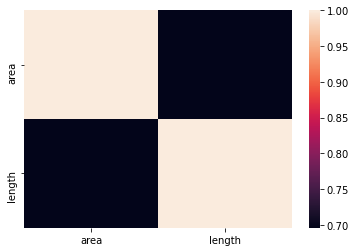

In [239]:
print(df[['area' , 'length']].corr())
sns.heatmap(df[['area' , 'length']].corr())

## Last Part Probability Part All 

In [19]:
sampleSpace=[]
temp=[]
cities = ['A', 'B', 'C', 'D', 'E']
for i in cities:
    for j in cities:
        for k in cities:
            sampleSpace.append(i+j+k)

In [22]:
sampleSpace

['AAA',
 'AAB',
 'AAC',
 'AAD',
 'AAE',
 'ABA',
 'ABB',
 'ABC',
 'ABD',
 'ABE',
 'ACA',
 'ACB',
 'ACC',
 'ACD',
 'ACE',
 'ADA',
 'ADB',
 'ADC',
 'ADD',
 'ADE',
 'AEA',
 'AEB',
 'AEC',
 'AED',
 'AEE',
 'BAA',
 'BAB',
 'BAC',
 'BAD',
 'BAE',
 'BBA',
 'BBB',
 'BBC',
 'BBD',
 'BBE',
 'BCA',
 'BCB',
 'BCC',
 'BCD',
 'BCE',
 'BDA',
 'BDB',
 'BDC',
 'BDD',
 'BDE',
 'BEA',
 'BEB',
 'BEC',
 'BED',
 'BEE',
 'CAA',
 'CAB',
 'CAC',
 'CAD',
 'CAE',
 'CBA',
 'CBB',
 'CBC',
 'CBD',
 'CBE',
 'CCA',
 'CCB',
 'CCC',
 'CCD',
 'CCE',
 'CDA',
 'CDB',
 'CDC',
 'CDD',
 'CDE',
 'CEA',
 'CEB',
 'CEC',
 'CED',
 'CEE',
 'DAA',
 'DAB',
 'DAC',
 'DAD',
 'DAE',
 'DBA',
 'DBB',
 'DBC',
 'DBD',
 'DBE',
 'DCA',
 'DCB',
 'DCC',
 'DCD',
 'DCE',
 'DDA',
 'DDB',
 'DDC',
 'DDD',
 'DDE',
 'DEA',
 'DEB',
 'DEC',
 'DED',
 'DEE',
 'EAA',
 'EAB',
 'EAC',
 'EAD',
 'EAE',
 'EBA',
 'EBB',
 'EBC',
 'EBD',
 'EBE',
 'ECA',
 'ECB',
 'ECC',
 'ECD',
 'ECE',
 'EDA',
 'EDB',
 'EDC',
 'EDD',
 'EDE',
 'EEA',
 'EEB',
 'EEC',
 'EED',
 'EEE']

In [73]:
samecity=0
differentcity = 0
for i in range(len(sampleSpace)):
    if(sampleSpace[i][0]==sampleSpace[i][1] or sampleSpace[i][0]==sampleSpace[i][2] or sampleSpace[i][1]==sampleSpace[i][2]):
        samecity+=1
    if(sampleSpace[i][0]!=sampleSpace[i][1] and sampleSpace[i][0]!=sampleSpace[i][2] and sampleSpace[i][1]!=sampleSpace[i][2]):
        differentcity+=1
    
        

In [74]:
samecity

65

In [75]:
prob = [samecity/len(sampleSpace)]

In [76]:
prob.append(differentcity/len(sampleSpace))

In [77]:
city = ["Same City", "Different city"]

In [78]:
prob

[0.52, 0.48]

<BarContainer object of 2 artists>

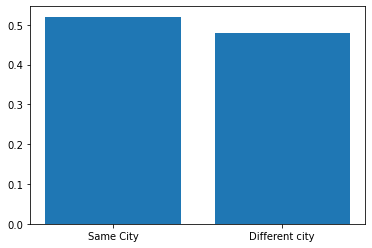

In [79]:
plt.bar(city,prob)

*This is a descrete distribution

*This is a multivariate problem